<h1><b>Estructura interna de un Modelo de lenguaje</b></h1>

Ejercicios

## Contexto

<h3>Paso 1: Obtener Gemini Key</h3>

Vamos a ir a la pagina: https://aistudio.google.com/


<b>Dar Click en "Get Api Key"</b>
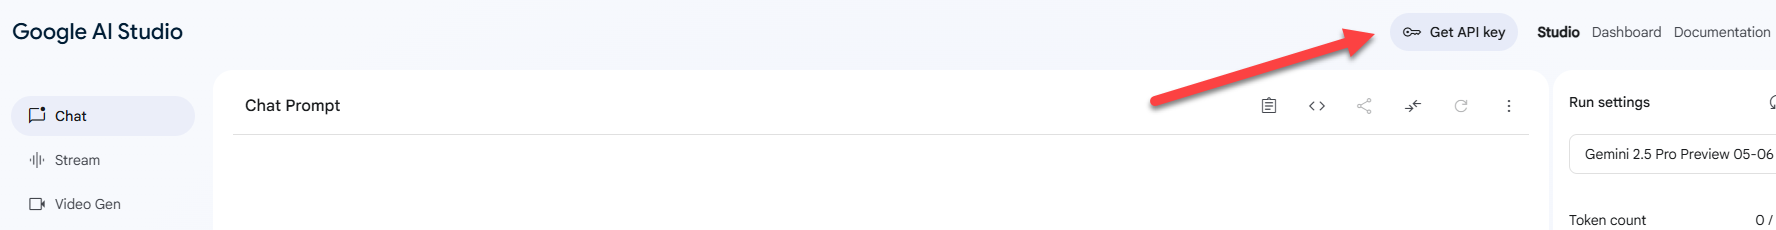

<b>Dar click en "Create Api Key"</b>

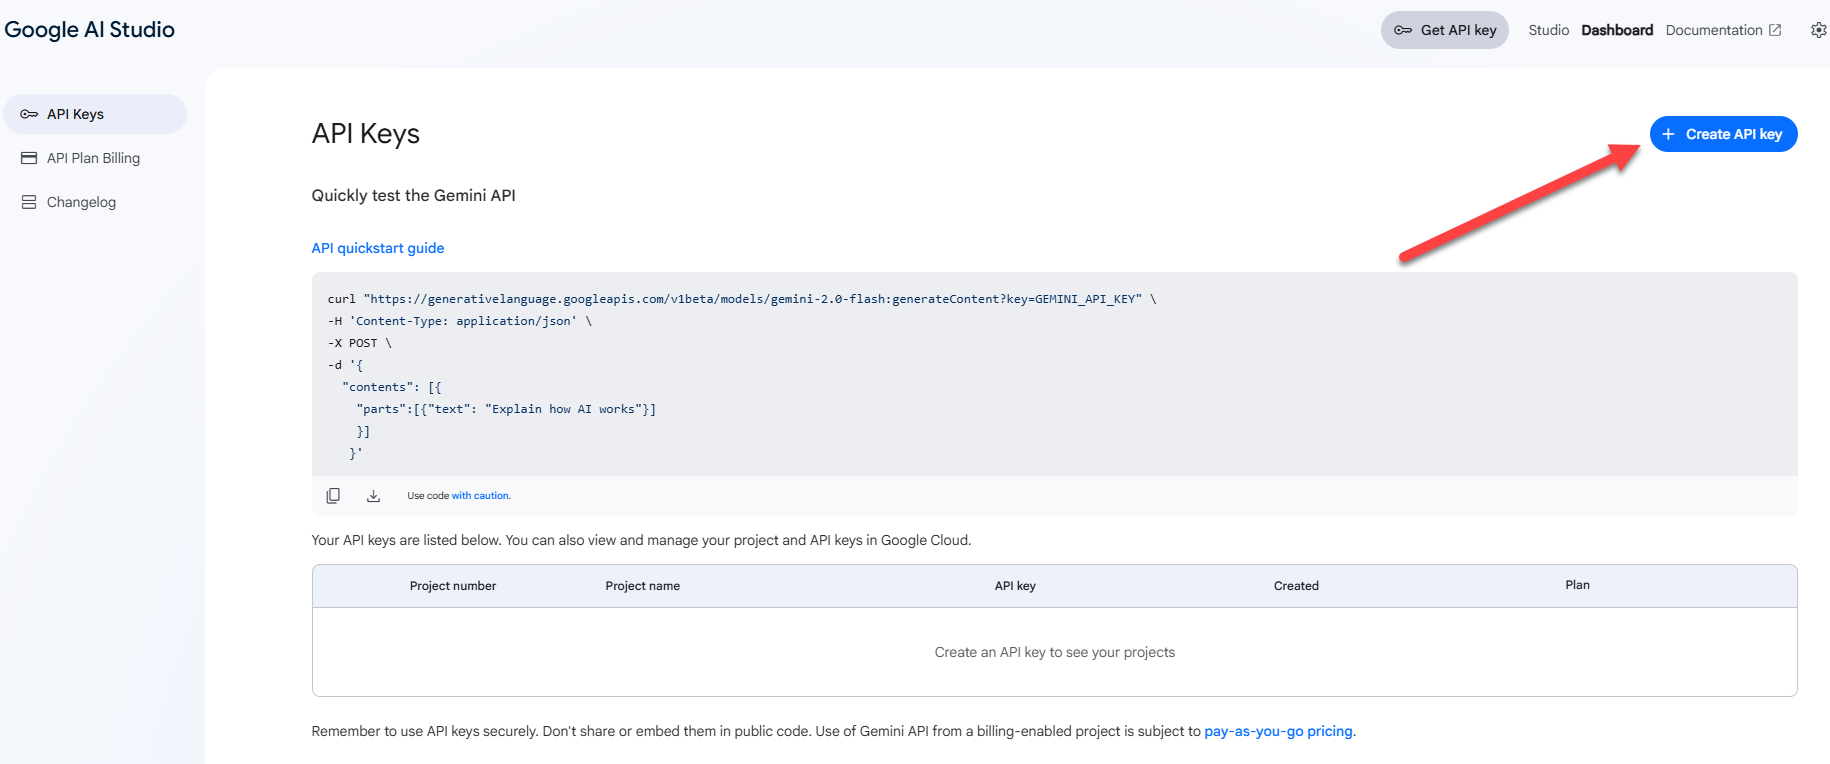

Click en "Ceate API Key in New Project"
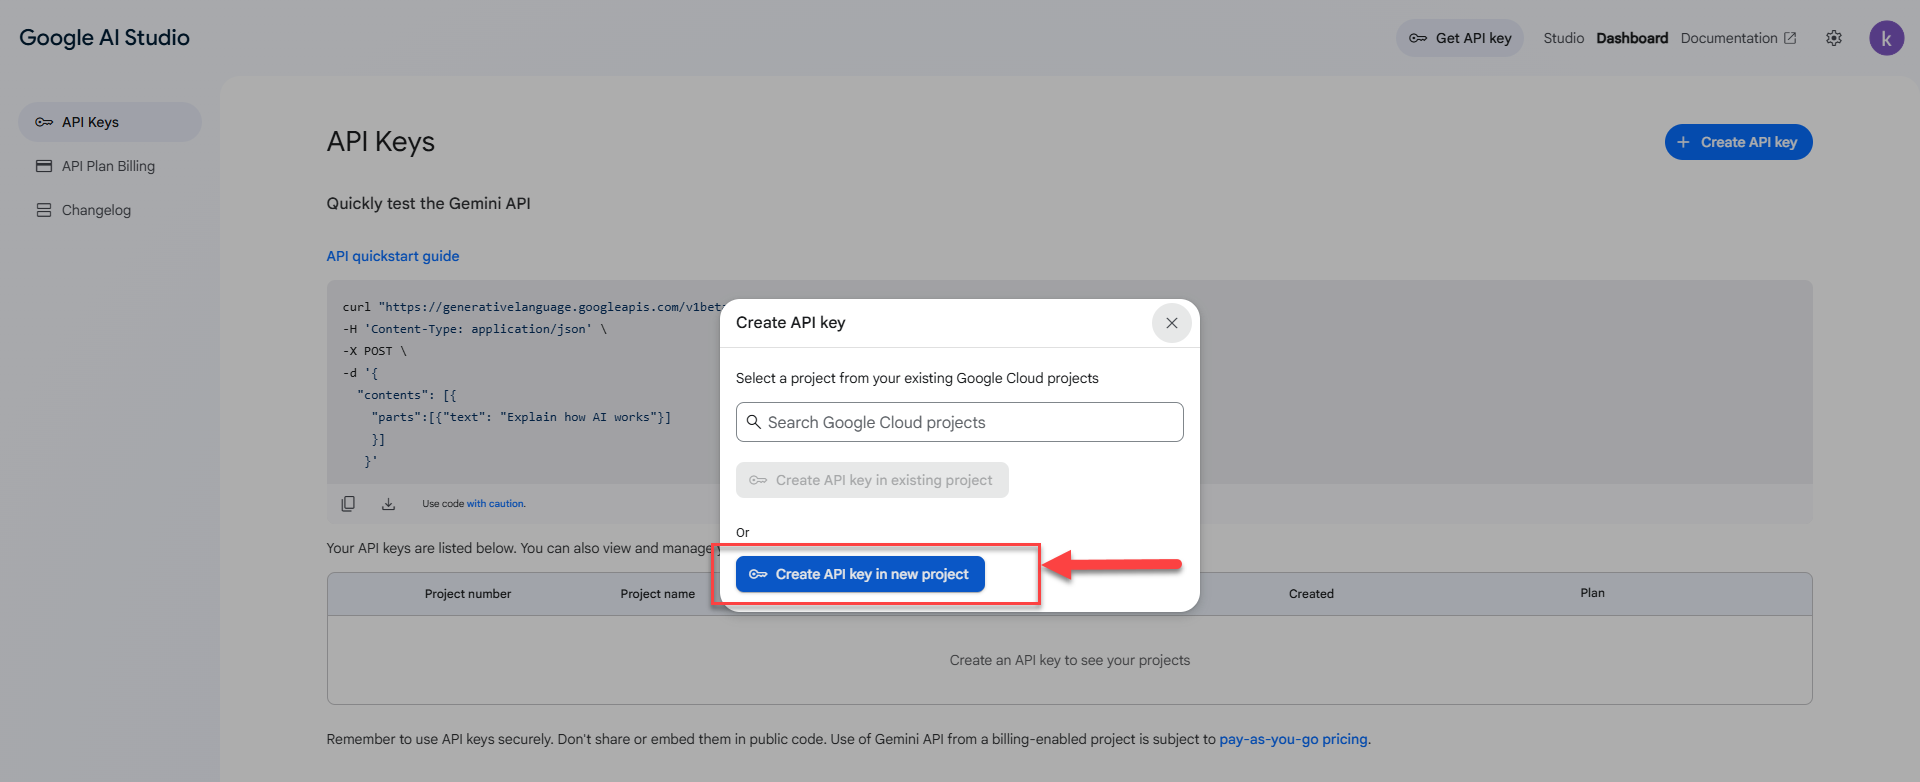

<b>Librerias</b>

In [ ]:
#Libreria para Gemini
%pip install google-generativeai
#!pip show google-generativeai

In [ ]:
from google.colab import userdata
import google.generativeai as genai
import os
import tiktoken

In [ ]:
#Accedemos a gemini
#genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

#Revisamos los modelos existentes
for model in genai.list_models():
    print(model.name)



Importamos pandas para leer archivos CSV. Abrimos el CSV de productos que se genero del taller "Web Scrapping"

In [ ]:
import pandas as pd

df = pd.read_csv("https://storage.googleapis.com/tallerdp_publico/taller02/products.csv")

Obtenemos los productos del CSV

In [ ]:
productos_texto = []
for _, row in df.iterrows():
    entry = f"Nombre: {row['product_name']}, Marca: {row['manufacturer']}, Precio: {row['first_price_value']} MXN"
    productos_texto.append(entry)

catalogo_texto = "\n".join(productos_texto[:50])  # limitamos a 50 articulos
print(catalogo_texto)

Contamos cuantos tokens aproximadamente son de la lista de articulos para pasarlo a gemini
- Analiza si excede el numero de tokens permitidos
- Cuantos tokens permite gemini?


In [ ]:
encoding = tiktoken.encoding_for_model("gpt-4o")
tokenscount = encoding.encode(catalogo_texto)
print("Numero de tokens: ", len(tokenscount))

Seleccionamos el modelo

In [ ]:
model = genai.GenerativeModel("models/gemini-2.0-flash")

Creamos el prompt

In [ ]:
prompt = f"""
Este es un catálogo de productos:

{catalogo_texto}

Pregunta: ¿Qué productos tienen un precio menor a 800 MXN y son de la marca Adidas?
"""

Contamos nuevamente los tokens

In [ ]:
tokenscount = encoding.encode(prompt)
print("Numero de tokens: ", len(prompt))

Enviamos el prompt al modelo y recibimos la respuesta

In [ ]:
response = model.generate_content(prompt)
print(response.text)

### Ejercicio
1. Obten 150 productos
2. Genera el prompt
3. Has una pregunta

- Analiza que parte es el contexto
- Cual es el context size

## Obtener productos
```python
productos100_texto = []
for _, row in df.iterrows():
    entry = f"Nombre: {row['product_name']}, Marca: {row['manufacturer']}, Precio: {row['first_price_value']} MXN"
    productos100_texto.append(entry)

catalogo100_texto = "\n".join(productos100_texto[:50])  # limitamos a 50 articulos
print(catalogo100_texto)
```

In [ ]:
# Codigo Aqui

### Elige una o utiliza las tres preguntas

1. ¿Qué productos cuestan menos de 800 MXN?
2. ¿Cuáles son de la marca Adidas?
3. ¿Qué productos tienen la palabra “Summer” en su nombre?

Nota: No olvides añadir la variable del catalogo de productos

In [ ]:
prompt = f"""
Este es un catálogo de productos:

{}

Preguntas:

"""

In [ ]:
response = model.generate_content(prompt)
print(response.text)